<a href="https://colab.research.google.com/github/NguyenVanDucAnh-20104015/AI-Bai-Tap/blob/main/BenhtrencayBap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Cay bap

/content/drive/MyDrive/Cay bap


In [ ]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_data = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Cay bap/Train',
    
    image_size = IMG_SIZE,
    label_mode = 'categorical',
    batch_size = BATCH_SIZE,
    shuffle = True
).cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

valid_datasets = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Cay bap/Val',
    image_size = IMG_SIZE,
    label_mode = 'categorical',
    batch_size = BATCH_SIZE
)
class_names = valid_datasets.class_names
valid_data = valid_datasets.cache().prefetch(buffer_size=tf.data.AUTOTUNE)


Found 1600 files belonging to 4 classes.
Found 400 files belonging to 4 classes.


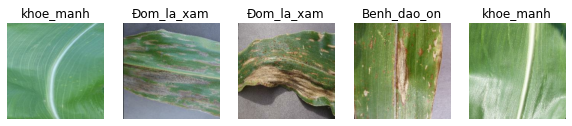

In [ ]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in train_data.take(1):
    for i in range(0,5):
        plt.subplot(2,5,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint32"))
        plt.title(class_names[np.argmax(label_batch[i])])
        plt.axis("off")

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import layers
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3),padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 128)      0

In [ ]:
model.compile(optimizer="adam", loss = "categorical_crossentropy", metrics=["accuracy"])
model.fit(train_data, epochs=100, batch_size=128)

Epoch 1/100
50/50 [==============================] - 100s 2s/step - loss: 48.9374 - accuracy: 0.7075
Epoch 2/100
50/50 [==============================] - 98s 2s/step - loss: 0.3595 - accuracy: 0.8569
Epoch 3/100
50/50 [==============================] - 99s 2s/step - loss: 0.3043 - accuracy: 0.8719
Epoch 4/100
50/50 [==============================] - 98s 2s/step - loss: 0.2370 - accuracy: 0.9050
Epoch 5/100
50/50 [==============================] - 99s 2s/step - loss: 0.2059 - accuracy: 0.9175
Epoch 6/100
50/50 [==============================] - 97s 2s/step - loss: 0.2069 - accuracy: 0.9237
Epoch 7/100
50/50 [==============================] - 99s 2s/step - loss: 0.1630 - accuracy: 0.9350
Epoch 8/100
50/50 [==============================] - 98s 2s/step - loss: 0.1533 - accuracy: 0.9413
Epoch 9/100
50/50 [==============================] - 99s 2s/step - loss: 0.0972 - accuracy: 0.9644
Epoch 10/100
50/50 [==============================] - 98s 2s/step - loss: 0.1925 - accuracy: 0.9350
Epoch 1

In [ ]:
model.save('caybap.h5')

In [ ]:
from tensorflow.keras.models import load_model
model_corn=load_model('caybap.h5')

In [ ]:
model.evaluate(train_data)
model.evaluate(valid_datasets)

13/13 [==============================] - 55s 2s/step - loss: 0.9966 - accuracy: 0.9125


[0.9966395497322083, 0.9125000238418579]

1/1 [==============================] - 0s 38ms/step
Common_rust


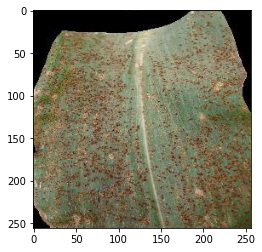

In [ ]:
import matplotlib.image as img
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
def predict(test_img_path):
    test_image = load_img(test_img_path, target_size = (224,224)) 
    test_image = img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(test_image)
    pred = np.argmax(result, axis=1)
    pred = pred[0]
    expression = ['Benh_dao_on', 'Common_rust', 'Khoe_manh', 'Dom_la_xam']
    test_image = img.imread(test_img_path)
    print(expression[pred])
    plt.imshow(test_image)
predict('/content/RS_Rust 2296_flipLR.JPG')

1/1 [==============================] - 0s 38ms/step
Khoe_manh


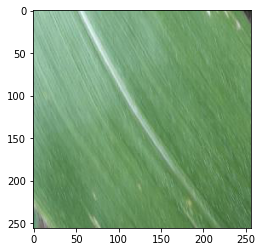

In [ ]:
import matplotlib.image as img
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
def predict(test_img_path):
    test_image = load_img(test_img_path, target_size = (224,224)) 
    test_image = img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(test_image)
    pred = np.argmax(result, axis=1)
    pred = pred[0]
    expression = ['Benh_dao_on', 'Common_rust', 'Khoe_manh', 'Dom_la_xam']
    test_image = img.imread(test_img_path)
    print(expression[pred])
    plt.imshow(test_image)
predict('/content/2515cbc5-85fa-47cd-81ce-dc2cac6819a5___R.S_HL 8297 copy.jpg')

1/1 [==============================] - 0s 33ms/step
Benh_dao_on


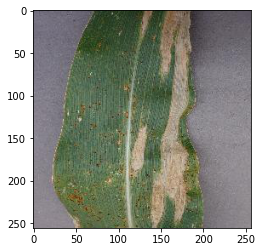

In [ ]:
import matplotlib.image as img
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
def predict(test_img_path):
    test_image = load_img(test_img_path, target_size = (224,224)) 
    test_image = img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(test_image)
    pred = np.argmax(result, axis=1)
    pred = pred[0]
    expression = ['Benh_dao_on', 'Common_rust', 'Khoe_manh', 'Dom_la_xam']
    test_image = img.imread(test_img_path)
    print(expression[pred])
    plt.imshow(test_image)
predict('/content/ae7fbdce-0d55-41d7-bbc9-a8f043771636___RS_NLB 4669.JPG')

1/1 [==============================] - 0s 36ms/step
Dom_la_xam


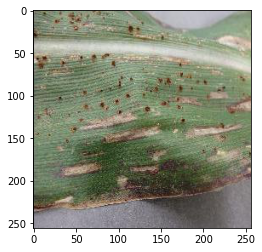

In [ ]:
import matplotlib.image as img
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
def predict(test_img_path):
    test_image = load_img(test_img_path, target_size = (224,224)) 
    test_image = img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(test_image)
    pred = np.argmax(result, axis=1)
    pred = pred[0]
    expression = ['Benh_dao_on', 'Common_rust', 'Khoe_manh', 'Dom_la_xam']
    test_image = img.imread(test_img_path)
    print(expression[pred])
    plt.imshow(test_image)
predict('/content/295e2145-800f-4c3c-9728-e45b1cd8e113___RS_GLSp 4316_270deg.JPG')